### Converting MNIST Dataset to Unsupervised Setting for Basic Visualization

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import datasets, manifold

In [2]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
pixel_values, targets = data

In [4]:
targets = targets.astype(int)

In [5]:
single_image = pixel_values[1, :].reshape(28, 28)

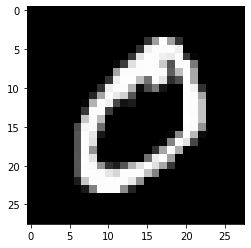

In [6]:
plt.imshow(single_image, cmap='gray');

In [7]:
tsne = manifold.TSNE(n_components=2, random_state=42)

In [8]:
transformed_data = tsne.fit_transform(pixel_values[:3000,:])

In [9]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data, targets[:3000])), columns=['x', 'y', 'targets'])

In [10]:
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5.0
1,-26.105896,-68.069321,0.0
2,-42.503582,35.580391,4.0
3,38.893967,26.663395,1.0
4,-14.770573,35.433247,9.0


In [11]:
tsne_df.loc[:,'targets'] = tsne_df.targets.astype(int)

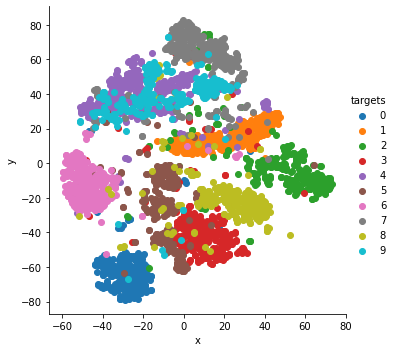

In [14]:
grid = sns.FacetGrid(tsne_df, hue="targets", height=5)
grid.map(plt.scatter, "x", "y").add_legend();